In [5]:
import akshare as ak

from collections import defaultdict
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import plotly

from greykite.common.data_loader import DataLoader
from greykite.algo.changepoint.adalasso.changepoint_detector import ChangepointDetector
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results



In [2]:
df = ak.fund_em_open_fund_info(fund="000217", indicator="单位净值走势")

In [3]:
metadata = MetadataParam(
    time_col='净值日期',
    value_col='单位净值',
    freq='D',
)

forecaster = Forecaster()  # Creates forecasts and stores the result
result = forecaster.run_forecast_config(  # result is also stored as `forecaster.forecast_result`.
    df=df,
    config=ForecastConfig(
        model_template=ModelTemplateEnum.SILVERKITE.name,
        forecast_horizon=30,  # forecasts 365 steps ahead
        coverage=0.95,         # 95% prediction intervals
        metadata_param=metadata
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


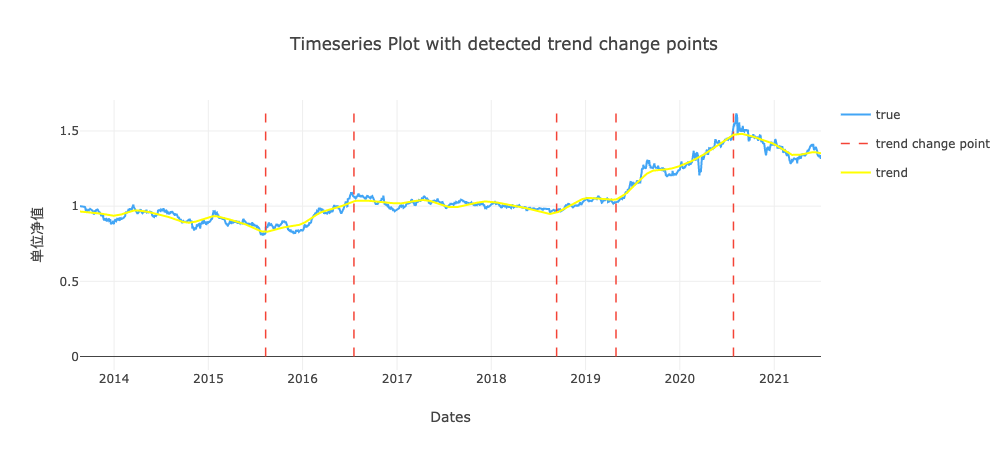

In [6]:
model = ChangepointDetector()
res = model.find_trend_changepoints(df,time_col='净值日期',value_col='单位净值',)
fig = model.plot(plot=False)  # plot = False returns a plotly figure object.
plotly.io.show(fig)